# Построение границы решений (decision boundary) для искусственной нейронной сети

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras  # Фреймворк для нейронных сетей
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential  # Последовательная модель
from tensorflow.keras.layers import Dense, Dropout  # Полносвязные слои и слой dropout

from utils.plotting import nn_plot_function
from utils.errors import step, sigmoid

warnings.filterwarnings("ignore", category=UserWarning, module='google.protobuf')

# Установка случайных seed для воспроизводимости результатов
np.random.seed(0)  # Фиксируем seed для numpy
tf.random.set_seed(1)  # Фиксируем seed для TensorFlow

# Создаём искусственный датасет "инопланетян"

In [2]:
data = {
    "Предложение": [
        "Аак", "Аак аак", "Бип", "Бип бип", "Аак бип", 
        "Аак аак бип", "Бип аак бип", "Бип аак бип аак"
    ],
    "Aaк": [1, 2, 0, 0, 1, 2, 1, 2],
    "Бип": [0, 0, 1, 2, 1, 1, 2, 2],
    "Настроение": ["Грустный", "Грустный", "Грустный", "Грустный", 
                   "Радостный", "Радостный", "Радостный", "Радостный"]
}

df = pd.DataFrame(data)
df

,Предложение,Aaк,Бип,Настроение
0,Аак,1,0,Грустный
1,Аак аак,2,0,Грустный
2,Бип,0,1,Грустный
3,Бип бип,0,2,Грустный
4,Аак бип,1,1,Радостный
5,Аак аак бип,2,1,Радостный
6,Бип аак бип,1,2,Радостный
7,Бип аак бип аак,2,2,Радостный


In [3]:
# Заменяем метки на числа
df['Настроение'] = df['Настроение'].map({'Грустный': 0, 
                                         'Радостный': 1})

# X — только признаки
X = df[['Aaк', 'Бип']]

# y — только целевая переменная
y = df['Настроение']

# Разделяем данные по настроению
happy = df[y == 1]
sad = df[y == 0]

# Общие настройки графики
figsize=(12, 4)
xlim=(-0.5, 3)
ylim=(-0.5, 3)

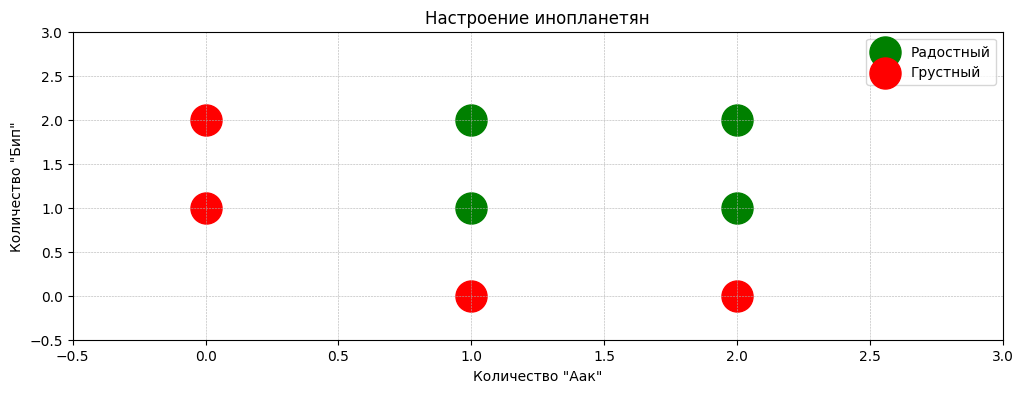

In [4]:
# Создаем фигуру
plt.figure(figsize=figsize)

# Рисуем точки
plt.scatter(happy['Aaк'], happy['Бип'], c='green', label='Радостный', s=500)
plt.scatter(sad['Aaк'], sad['Бип'], c='red', label='Грустный', s=500)

# Настраиваем оси и заголовок
plt.xlabel('Количество "Аак"')
plt.ylabel('Количество "Бип"')
plt.title('Настроение инопланетян')
plt.xlim(xlim)
plt.ylim(ylim)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.4)
plt.show()

In [5]:
# Первый линейный классификатор (нейрон первого слоя)
def line_1(a, b):
    return step(6 * a + 10 * b - 15)  # веса: 6 и 10, смещение -15

# Второй линейный классификатор (нейрон первого слоя)
def line_2(a, b):
    return step(10 * a + 6 * b - 15)  # веса: 10 и 6, смещение -15

# Функция смещения (bias)
def bias(a, b):
    return 1  # всегда возвращает 1 (аналог единичного нейрона)

# Нейронная сеть с ступенчатой функцией активации (двухслойная)
def nn_with_step(a, b):
    # Комбинируем выходы первого слоя с весами 1 и 1, и смещением -1.5
    return step(step(6 * a + 10 * b - 15) + 
                step(10 * a + 6 * b - 15) - 1.5)

# Нейронная сеть с сигмоидной функцией активации (двухслойная)
def nn_with_sigmoid(a, b):
    # Комбинируем выходы первого слоя с весами 1.0 и 1.0, и смещением -1.5
    return sigmoid(1.0 * sigmoid(6 * a + 10 * b - 15) + 
                   1.0 * sigmoid(10 * a + 6 * b - 15) - 1.5)

# Визуализация границ первого слоя (линейные классификаторы и смещение)

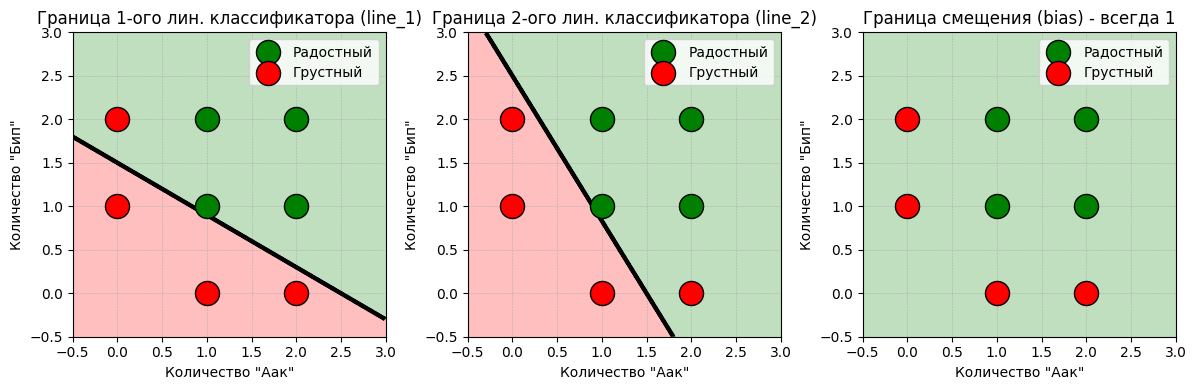

In [6]:
# Создаем фигуру с 1 строкой и 3 столбцами для первых трех графиков
plt.figure(figsize=figsize)

# Первый график - line_1
plt.subplot(1, 3, 1)
nn_plot_function(line_1, xlim, ylim, happy, sad)
plt.title("Граница 1-ого лин. классификатора (line_1)")

# Второй график - line_2
plt.subplot(1, 3, 2)
nn_plot_function(line_2, xlim, ylim, happy, sad)
plt.title("Граница 2-ого лин. классификатора (line_2)")

# Третий график - bias
plt.subplot(1, 3, 3)
nn_plot_function(bias, xlim, ylim, happy, sad)
plt.title("Граница смещения (bias) - всегда 1")

plt.tight_layout()
plt.show()

# Визуализация границ второго слоя (нелинейные классификаторы)

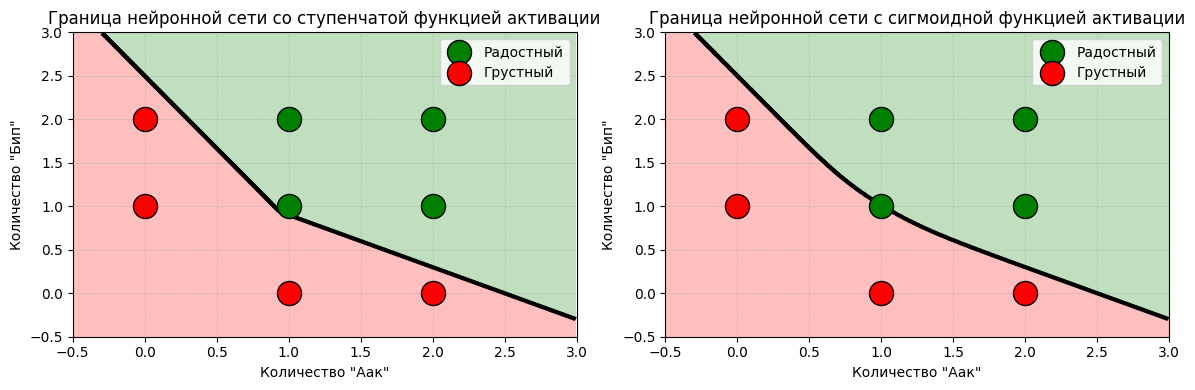

In [7]:
# Создаем фигуру с 1 строкой и 2 столбцами для следующих двух графиков
plt.figure(figsize=figsize)

# Первый график - nn_with_step
plt.subplot(1, 2, 1)
nn_plot_function(nn_with_step, xlim, ylim, happy, sad)
plt.title("Граница нейронной сети со ступенчатой функцией активации")

# Второй график - nn_with_sigmoid
plt.subplot(1, 2, 2)
nn_plot_function(nn_with_sigmoid, xlim, ylim, happy, sad)
plt.title("Граница нейронной сети с сигмоидной функцией активации")

plt.tight_layout()
plt.show()

# Графический пример классификации точек на плоскости с использованием нейронной сети

## Загрузка датасета

In [8]:
# Загружаем датасет 'one_circle.csv' (один круг)
df = pd.read_csv('data/one_circle.csv', index_col=0)  # Читаем CSV-файл, первый столбец - индекс

x = np.array(df[['x_1', 'x_2']])  # Извлекаем признаки x_1 и x_2 в numpy массив
y = np.array(df['y']).astype(int)  # Извлекаем метки классов и преобразуем в целые числа

df

,x_1,x_2,y
0,-0.759416,2.753240,0
1,-1.885278,1.629527,0
2,2.463302,-1.023869,0
3,-1.986004,-0.898810,0
4,2.010834,-2.580117,0
...,...,...,...
105,-1.376637,2.778703,1
106,-0.703722,0.215382,1
107,0.729767,-2.479655,1
108,-1.715920,-0.393404,1


## Визуализация данных

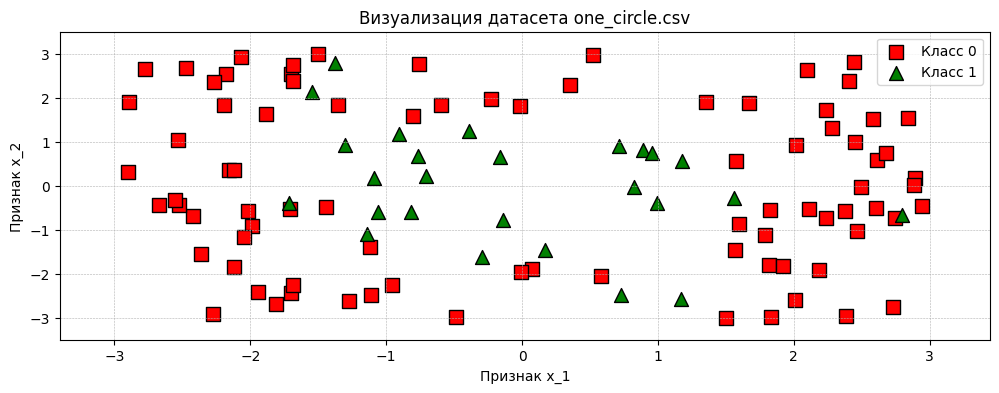

In [9]:
# Настройки графика
xlim = (df['x_1'].min() - 0.5, df['x_1'].max() + 0.5)
ylim = (df['x_2'].min() - 0.5, df['x_2'].max() + 0.5)

plt.figure(figsize=figsize)

# Разделяем данные по классам
class_0 = df[df['y'] == 0]
class_1 = df[df['y'] == 1]

# Рисуем точки
plt.scatter(class_0['x_1'], class_0['x_2'], c='red', marker='s', label='Класс 0', s=100, ec='black')
plt.scatter(class_1['x_1'], class_1['x_2'], c='green', marker='^', label='Класс 1', s=100, ec='black')

# Настраиваем оси и заголовок
plt.xlabel('Признак x_1')
plt.ylabel('Признак x_2')
plt.title('Визуализация датасета one_circle.csv')
plt.xlim(xlim)
plt.ylim(ylim)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.4)

plt.show()

## Предварительная обработка данных

In [10]:
# Преобразуем метки классов в one-hot encoding (категориальный формат)
categorized_y = np.array(to_categorical(y, 2))  # Преобразуем y в one-hot векторы (2 класса)

## Создание и компиляция нейронной сети

In [11]:
# Строим модель нейронной сети
model = Sequential()  # Создаем последовательную модель

# Добавляем слои:
# 1. Полносвязный слой с 128 нейронами, активация ReLU, входная размерность 2 (x_1 и x_2)
model.add(Dense(128, activation='relu', input_shape=(2,)))

# 2. Слой Dropout с вероятностью 20% (для предотвращения переобучения)
model.add(Dropout(.2))

# 3. Полносвязный слой с 64 нейронами и активацией ReLU
model.add(Dense(64, activation='relu'))

# 4. Еще один слой Dropout с вероятностью 20%
model.add(Dropout(.2))

# 5. Выходной слой с 2 нейронами (по числу классов) и активацией softmax (для вероятностей классов)
model.add(Dense(2, activation='softmax'))

# Компилируем модель:
# - Функция потерь: категориальная кросс-энтропия (для многоклассовой классификации)
# - Оптимизатор: adam (адаптивный метод градиентного спуска)
# - Метрика: точность (accuracy)
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Выводим информацию о модели
model.summary()  # Показывает архитектуру сети и количество параметров

C:\Users\novos\Desktop\GitHub\grokking-machine-learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,770 (34.26 KB)

 Trainable params: 8,770 (34.26 KB)

 Non-trainable params: 0 (0.00 B)

## Обучение нейронной сети

In [12]:
# Обучение нейронной сети
# Обучаем модель на данных:
# - x: признаки
# - categorized_y: метки в one-hot формате
# - epochs: 200 эпох (проходов по всему датасету)
# - batch_size: 10 (размер мини-пакета для градиентного спуска)
model.fit(x, categorized_y, epochs=200, batch_size=10, verbose=0)

## График классификации нейронной сети

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step


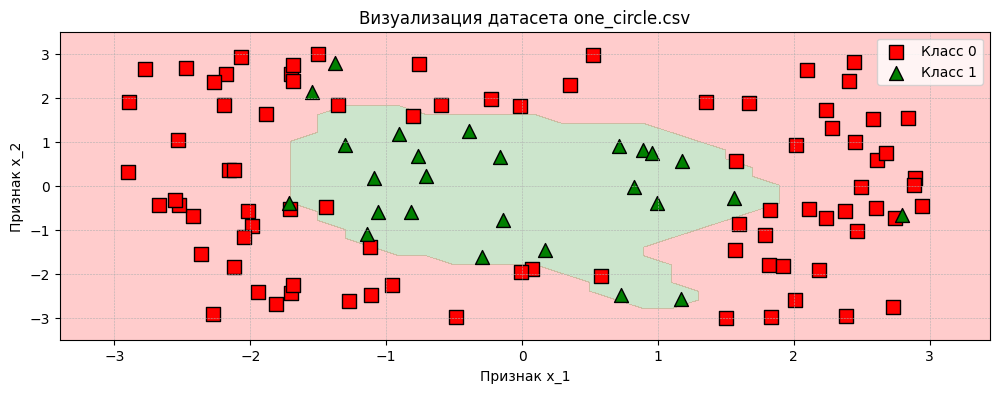

In [13]:
# Функция g(Z) преобразует предсказания модели в метки классов (0 или 1)
def g(Z):
    # Лямбда-функция f: возвращает 1, если второй элемент > первого, иначе 0
    f = lambda x: int(x[1] > x[0])
    # Применяем f к каждому элементу массива Z и возвращаем массив меток
    return np.array([f(i) for i in Z])


plot_step = 0.2  # Шаг сетки для построения границы решения

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

plt.figure(figsize=figsize)

# Создаем сетку точек для визуализации границы решения:
# xx и yy — координаты всех точек на сетке
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step),  # Диапазон по оси X
    np.arange(y_min, y_max, plot_step)   # Диапазон по оси Y
)

# Получаем предсказания модели для всех точек сетки:
# Преобразуем сетку в массив точек (np.c_ объединяет координаты)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  # возвращает вероятности классов (one-hot)

# Функция g(Z) преобразует вероятности в метки (0 или 1)
Z = g(Z).reshape(xx.shape)  # возвращает массив в форме сетки

# Заливаем области графика цветами в зависимости от предсказанного класса:
plt.contourf(xx, yy, Z, 
             colors=['red', 'green'],  # цвета для классов 0 и 1
             alpha=0.2,  # прозрачность заливки
             levels=range(-1, 2))  # уровни для контуров (чтобы разделить два класса)

# class_0 — точки класса 0 (красные квадраты)
plt.scatter(class_0['x_1'], class_0['x_2'], c='red', marker='s', label='Класс 0', s=100,ec='black')

# class_1 — точки класса 1 (зеленые треугольники)
plt.scatter(class_1['x_1'], class_1['x_2'], c='green', marker='^', label='Класс 1', s=100, ec='black')

plt.xlabel('Признак x_1')  # Подпись оси X
plt.ylabel('Признак x_2')  # Подпись оси Y
plt.title('Визуализация датасета one_circle.csv')  # Заголовок
plt.xlim(xlim)
plt.ylim(ylim)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.4)
plt.show()

# Построение нейронной сети для распознавания изображений

In [14]:
# Импорт и загрузка набора данных MNIST (рукописные цифры)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Вывод размера наборов данных
print("Размер тренировочного набора", len(x_train))  # 60000 изображений
print("Размер тестового набора", len(x_test))  # 10000 изображений

Размер тренировочного набора 60000
Размер тестового набора 10000


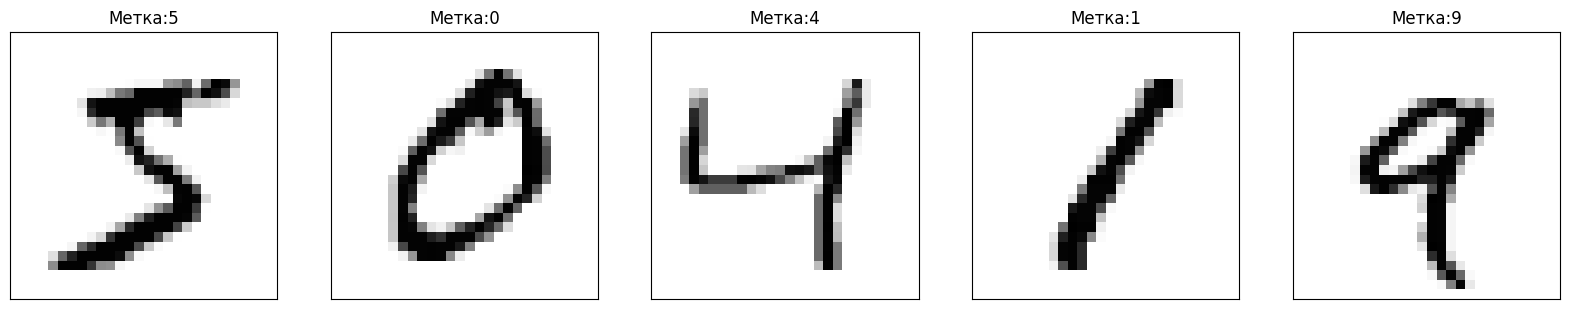

In [15]:
# Визуализация первых 5 изображений из тренировочного набора
fig = plt.figure(figsize=(20,20))  # Создаем фигуру большого размера
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])  # Создаем подграфики без осей
    ax.imshow(x_train[i], cmap='Greys')  # Показываем изображение
    ax.set_title('Метка:' + str(y_train[i]))  # Подписываем метку

## Предварительная обработка данных

In [16]:
# Изменение формы данных (преобразование изображений 28x28 в векторы 784x1)
x_train_reshaped = x_train.reshape(-1, 28*28)  # -1 означает автоматическое определение размера
x_test_reshaped = x_test.reshape(-1, 28*28)

# Преобразование меток в one-hot encoding (категориальные)
y_train_cat = to_categorical(y_train, 10)  # 10 классов (цифры 0-9)
y_test_cat = to_categorical(y_test, 10)

# Построение и обучение нейронной сети

In [17]:
# Создание модели
model = Sequential()  # Инициализация последовательной модели

# Добавление слоев:
model.add(Dense(128, activation='relu', input_shape=(28*28,)))  # Первый скрытый слой (128 нейронов)
model.add(Dropout(.2))  # Dropout для регуляризации (отключает 20% нейронов)
model.add(Dense(64, activation='relu'))  # Второй скрытый слой (64 нейрона)
model.add(Dropout(.2))  # Еще Dropout
model.add(Dense(10, activation='softmax'))  # Выходной слой (10 нейронов для 10 классов)

# Компиляция модели
model.compile(loss='categorical_crossentropy',  # Функция потерь для многоклассовой классификации
              optimizer='adam',  # Оптимизатор Adam
              metrics=['accuracy'])  # Метрика - точность

# Вывод информации о модели
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Обучение модели
model.fit(x_train_reshaped, y_train_cat, 
          epochs=10,  # Количество эпох обучения
          batch_size=10)  # Размер батча

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.6864 - loss: 1.9086
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8443 - loss: 0.5749
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8815 - loss: 0.4405
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8961 - loss: 0.3992
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9083 - loss: 0.3664
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9076 - loss: 0.3528
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9129 - loss: 0.3378
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9168 - loss: 0.3273
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9196 - loss: 0.3261
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9187 - loss: 0.3362


In [19]:
# Получение предсказаний
predictions_vector = model.predict(x_test_reshaped)  # Получаем вектор вероятностей
predictions = [np.argmax(pred) for pred in predictions_vector]  # Преобразуем в метки классов

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step


Истинная метка: 4
Предсказание: 4


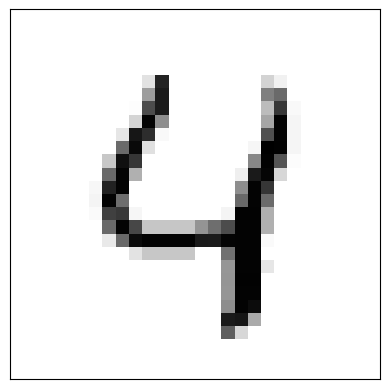

In [20]:
# Визуализация и проверка предсказания для 5-го тестового изображения
plt.imshow(x_test[4], cmap='Greys')
plt.xticks([])  # Убираем оси
plt.yticks([])
print("Истинная метка:", y_test[4])
print("Предсказание:", predictions[4])

Истинная метка: 3
Предсказание: 8


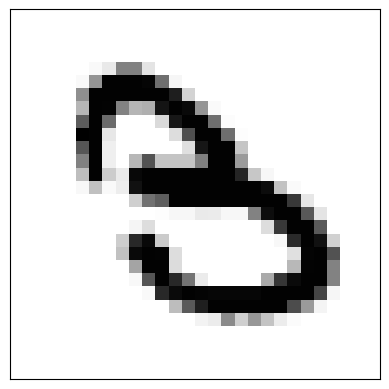

In [21]:
# Визуализация и проверка предсказания для 19-го тестового изображения
plt.imshow(x_test[18], cmap='Greys')
plt.xticks([])
plt.yticks([])
print("Истинная метка:", y_test[18])
print("Предсказание:", predictions[18])

In [22]:
# Оценка точности модели на тестовом наборе
num_correct = 0  # Счетчик правильных предсказаний
for i in range(len(predictions)):
    if predictions[i] == y_test[i]:
        num_correct += 1

# Вывод результатов
print("Модель предсказала верно", num_correct, "раз из", len(y_test))
print("Точность модели:", num_correct/len(y_test))

Модель предсказала верно 9549 раз из 10000
Точность модели: 0.9549


# Использование нейронной сети регрессии для предсказания цен на жилье в Хайдарабаде

In [23]:
# Загрузка и предварительная обработка данных
housing = pd.read_csv('data/Hyderabad.csv')  # загружаем данные из CSV-файла

# Разделяем данные на признаки (features) и целевую переменную (labels)
features = housing.drop(['Location', 'Price'], axis=1)  # удаляем столбцы 'Location' и 'Price' - оставляем только признаки
labels = housing['Price']  # целевая переменная - цены на жилье

## Создание и обучение нейронной сети

In [24]:
# Строим модель последовательного типа (слои идут один за другим)
model = Sequential()

# Добавляем слои нейронной сети:

# Первый скрытый слой с 38 нейронами (по числу входных признаков), 
# функция активации ReLU и указание формы входных данных (38 признаков)
model.add(Dense(38, activation='relu', input_shape=(38,)))

# Слой Dropout для регуляризации - случайно "выключает" 20% нейронов для предотвращения переобучения
model.add(Dropout(.2))

# Второй скрытый слой с 128 нейронами и ReLU активацией
model.add(Dense(128, activation='relu'))

# Еще один слой Dropout
model.add(Dropout(.2))

# Третий скрытый слой с 64 нейронами и ReLU активацией
model.add(Dense(64, activation='relu'))

# Последний слой Dropout
model.add(Dropout(.2))

# Выходной слой с 1 нейроном (регрессия - предсказываем одно число - цену)
model.add(Dense(1))

# Компиляция модели:
# loss = 'mean_squared_error' - используем среднеквадратичную ошибку как функцию потерь
# optimizer='adam' - используем оптимизатор Adam
# metrics=[keras.metrics.RootMeanSquaredError()] - дополнительно отслеживаем RMSE в процессе обучения
model.compile(loss = 'mean_squared_error', optimizer='adam', metrics=[keras.metrics.RootMeanSquaredError()])

# Выводим информацию о структуре модели
model.summary()

C:\Users\novos\Desktop\GitHub\grokking-machine-learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 38)                  │           1,482 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 38)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,795 (57.79 KB)

 Trainable params: 14,795 (57.79 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Обучение модели:
# features - входные данные
# labels - целевые значения
# epochs=10 - количество эпох обучения
# batch_size=10 - размер батча (количество образцов для одного шага градиентного спуска)
model.fit(features, labels, epochs=10, batch_size=10)

Epoch 1/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - loss: 151324599517184.0000 - root_mean_squared_error: 12301406.0000
Epoch 2/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 41260266029056.0000 - root_mean_squared_error: 6423415.5000
Epoch 3/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 33503968231424.0000 - root_mean_squared_error: 5788261.0000
Epoch 4/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - loss: 34073296764928.0000 - root_mean_squared_error: 5837233.5000
Epoch 5/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - loss: 33561801392128.0000 - root_mean_squared_error: 5793255.0000
Epoch 6/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 35224742264832.0000 - root_mean_squared_error: 5935043.5000
Epoch 7/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 33821223288832.0000 - root_mean_squared_error: 5815601.5000
Epoch 8/10
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 35168677003264.0000 - root_mean_squared_error: 5930318.5000
Epoch 9/10
252/252 ━━━

## Оценка модели и предсказания

In [26]:
# Оценка качества модели на обучающих данных (возвращает loss и метрики, указанные при компиляции)
model.evaluate(features, labels)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 30648798543872.0000 - root_mean_squared_error: 5536135.5000


[30648798543872.0, 5536135.5]

In [27]:
# Получение предсказаний модели для всех входных данных
predictions = model.predict(features)

# Создаем DataFrame для сравнения
comparison_df = pd.DataFrame({
    'Истинная цена': labels,  # истинные значения
    'Предсказанная цена': predictions.flatten(),  # предсказания (flatten() преобразует 2D массив в 1D)
    'Разница': labels - predictions.flatten(),  # разница между истинным и предсказанным значением
    'Относительная ошибка (%)': ((labels - predictions.flatten()) / labels) * 100  # процент ошибки
})

# Сортировка по наибольшим абсолютным ошибкам
comparison_df['Абсолютная ошибка'] = abs(comparison_df['Разница'])

# Выводим первые 10 строк для наглядности
print("Сравнение истинных и предсказанных цен:")
display(comparison_df.sort_values('Абсолютная ошибка', ascending=False).head(20))

# Дополнительно можно вывести статистику по ошибкам
print("\nСтатистика по ошибкам:")
print(comparison_df['Относительная ошибка (%)'].describe())

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step
Сравнение истинных и предсказанных цен:


,Истинная цена,Предсказанная цена,Разница,Относительная ошибка (%),Абсолютная ошибка
2385,165000000,18013328.0,146986672.0,89.082832,146986672.0
2079,57500000,24683712.0,32816288.0,57.071805,32816288.0
1884,55000000,22618324.0,32381676.0,58.875775,32381676.0
1814,62300000,31457756.0,30842244.0,49.506010,30842244.0
2354,61400000,30994934.0,30405066.0,49.519651,30405066.0
1756,61000000,30802514.0,30197486.0,49.504075,30197486.0
2463,36000000,7603144.0,28396856.0,78.880156,28396856.0
1757,55800000,28181556.0,27618444.0,49.495419,27618444.0
1736,45000000,17686162.0,27313838.0,60.697418,27313838.0
1831,29000000,55690200.0,-26690200.0,-92.035172,26690200.0



Статистика по ошибкам:
count    2518.000000
mean      -35.784716
std        48.912621
min      -519.641185
25%       -63.723536
50%       -31.007489
75%        -1.185044
max        89.082832
Name: Относительная ошибка (%), dtype: float64


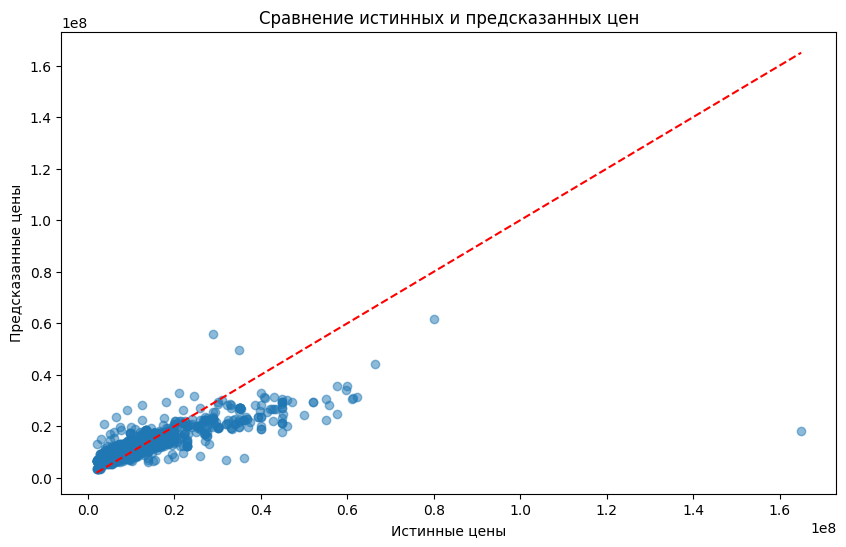

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(labels, predictions, alpha=0.5)
plt.plot([labels.min(), labels.max()], [labels.min(), labels.max()], 'r--')  # линия идеального предсказания
plt.xlabel('Истинные цены')
plt.ylabel('Предсказанные цены')
plt.title('Сравнение истинных и предсказанных цен')
plt.show()